# Capstone Breakdown Group 1A- Jahnavi Branch

**Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.**

## EDA process

Our project is divided in the following two umbrella categories:

PROFIT:

- Budget v Revenue
- Genre vs. Revenue 
- Popularity v Revenue
- Foreign/Domestic Results vs. Revenue  

POPULARITY: X

- Director vs. Popularity/Voter Avg. x
- Genre vs. Popularity/Voter Avg. 
- Domestic/International vs. Popularity/Voter Avg.  

## Specific insight

We want to gain insights from our data on the following specific points. We are performing EDA to be able to answer questions regarding:

- Revenue compared to rating of the film (critics and audience) x
- I.P and foreign/domestic revenue x
- Original language to revenue 
- Market: domestic/ global
- Writers and directors to revenue

## Import Relevent Packages

In [1]:
# Import packages

import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt 
import itertools 
%matplotlib inline

## Read the Data Sets

In [2]:
# Read data sets

rtDF = pd.read_csv("Data/rt.movie_info.tsv", sep="\t") #Rotten Tomatoes Movies
rtDF_reviews = pd.read_csv("Data/rt.reviews.tsv", sep="\t", encoding = "latin_1") #Rotten Tomatoes Reviews
bomDF = pd.read_csv("Data/bom.movie_gross.csv") #Box Office Mojo Database
tmdbDF = pd.read_csv("Data/tmdb.movies.csv",index_col=0) #The MovieDB
tnmDF = pd.read_csv("Data/tn.movie_budgets.csv") #The Numbers

conn = sqlite3.connect('Data/im.db')

## Clean Data for Rotten Tomatoes Datasets

In [3]:
#Visualize rotten tomatoes

def splits(string):
    string = str(string)
    return string.split("|")
rtDF["genre"] = rtDF["genre"].apply(splits)
rtDF['genre'] = rtDF['genre'].astype('object')
rtDF

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action and Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Musical and Performing Arts]",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery and Suspense]",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,"[Action and Adventure, Horror, Mystery and Sus...",NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,"[Comedy, Science Fiction and Fantasy]",Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,"[Classics, Comedy, Drama, Musical and Performi...",Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,"[Comedy, Drama, Kids and Family, Sports and Fi...",David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [4]:
# drop unneccesary columns
rtDF.drop(columns=['currency','studio','synopsis','dvd_date'],inplace=True)

In [5]:
rtDF_reviews.info()
rtDF_reviews.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [6]:
print(sum(rtDF_reviews['rating'].isna()))
# Dropping top_critic, publisher, and date columns because the information provided is not relevant to the scope of this study
rtDF_reviews.drop(columns=["top_critic","publisher","date"],inplace=True)


13517


In [7]:
rtDF_reviews['fresh'].replace(['fresh', 'rotten'], [1,0], inplace=True)
rtDF_reviews.groupby(['id'])['fresh'].sum()
rtDF_reviews.groupby(['id', 'fresh']).size()

id    fresh
3     0         60
      1        103
5     0          5
      1         18
6     0         25
              ... 
1998  1          2
1999  0         19
      1         27
2000  0         20
      1         18
Length: 2070, dtype: int64

In [8]:
#Create df grouped by id
rtDF_grouped = rtDF_reviews.groupby(['id'])
#add column in main df that adds sum of fresh column by grouped id 
rtDF_reviews['sum_fresh'] = rtDF_grouped['fresh'].transform(sum)
#add column in main df that counts the total observations in column grouped by id
rtDF_reviews['count_fresh'] = rtDF_grouped['fresh'].transform('count')
rtDF_reviews['percentage'] = rtDF_reviews['sum_fresh'] / rtDF_reviews['count_fresh']
rtDF_reviews

,id,review,rating,fresh,critic,sum_fresh,count_fresh,percentage
0,3,A distinctly gallows take on contemporary fina...,3/5,1,PJ Nabarro,103,163,0.631902
1,3,It's an allegory in search of a meaning that n...,NaN,0,Annalee Newitz,103,163,0.631902
2,3,... life lived in a bubble in financial dealin...,NaN,1,Sean Axmaker,103,163,0.631902
3,3,Continuing along a line introduced in last yea...,NaN,1,Daniel Kasman,103,163,0.631902
4,3,... a perverse twist on neorealism...,NaN,1,NaN,103,163,0.631902
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,1,Laura Sinagra,18,38,0.473684
54428,2000,NaN,1/5,0,Michael Szymanski,18,38,0.473684
54429,2000,NaN,2/5,0,Emanuel Levy,18,38,0.473684
54430,2000,NaN,2.5/5,0,Christopher Null,18,38,0.473684


In [9]:
rtDF_reviews['rating'].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

# Cleaning of Box Office Mojo

In [10]:
print(bomDF.info())
bomDF.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [11]:
# Dropped rows where domestic gross was NaN
bomDF = bomDF[bomDF['domestic_gross'].notna()]
# Replace the comma to have nothing
bomDF['foreign_gross'] = bomDF['foreign_gross'].replace(',','', regex=True)
#Change the type to number
bomDF["foreign_gross"] = pd.to_numeric(bomDF["foreign_gross"])
#Drop column studio as we will not be using it
#bomDF.drop(columns=['studio'],inplace=True)
#Fill foreign_gross null values with zero
bomDF["foreign_gross"] = bomDF["foreign_gross"].fillna(0)
bomDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3359 non-null   float64
 4   year            3359 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.5+ KB


## The MovieDB DF Cleaning

In [12]:
print(tmdbDF.info())
tmdbDF.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
GenreDict = {28:"Action", 12:"Adventure", 16:"Animation", 35:"Comedy", 80:"Crime",
             99:"Documentary",18:"Drama",10751:"Family",14:"Fantasy",36:"History",
             27:"Horror",10402:"Music",9648:"Mystery",10749:"Romance",
             878:"Science Fiction", 10770:"TV Movie",53:"Thriller",10752:"War",37:"Western"}

In [14]:
tmdbDF['genre_ids'].isin(["[Action]"])
tmdbDF['genre_ids'].str.find(sub = 'Drama')

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
26512   -1
26513   -1
26514   -1
26515   -1
26516   -1
Name: genre_ids, Length: 26517, dtype: int64

In [15]:
tmdbDF['genre_ids'] = tmdbDF['genre_ids'].apply(eval)
tmdbDF['genre_ids']= tmdbDF['genre_ids'].apply(lambda x: [GenreDict[i] for i in x])

In [16]:
#commented out
# for i in tmdbDF['genre_ids']:
#     for j in i:
#         print(j)
# tmdbDF['genre_ids'].value_counts()

In [17]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])
to_1D(tmdbDF["genre_ids"]).value_counts()

Drama              8303
Comedy             5652
Documentary        4965
Thriller           4207
Horror             3683
Action             2612
Romance            2321
Science Fiction    1762
Family             1565
Crime              1515
Animation          1486
Adventure          1400
Music              1267
Mystery            1237
Fantasy            1139
TV Movie           1084
History             622
War                 330
Western             205
dtype: int64

In [18]:
tmdbDF[["genre_ids", 'vote_average']]

,genre_ids,vote_average
0,"[Adventure, Fantasy, Family]",7.7
1,"[Fantasy, Adventure, Animation, Family]",7.7
2,"[Adventure, Action, Science Fiction]",6.8
3,"[Animation, Comedy, Family]",7.9
4,"[Action, Science Fiction, Adventure]",8.3
...,...,...
26512,"[Horror, Drama]",0.0
26513,"[Drama, Thriller]",0.0
26514,"[Fantasy, Action, Adventure]",0.0
26515,"[Family, Adventure, Action]",0.0


In [19]:
#Commented out
#[(k, g) for k, g in itertools.groupby(tmdbDF["genre_ids"])]

In [20]:
print(tnmDF.info())
tnmDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
rtDF_reviews.groupby('id').sum()

,fresh,sum_fresh,count_fresh,percentage
id,,,,
3,103,16789,26569,103.0
5,18,414,529,18.0
6,32,1824,3249,32.0
8,56,4200,5625,56.0
10,50,5400,11664,50.0
...,...,...,...,...
1996,96,13728,20449,96.0
1997,10,280,784,10.0
1998,2,4,4,2.0


## Joining Databases

In [22]:
# Re-name Columns for common merge
tmdbDF=tmdbDF.rename(columns={'title': 'movie'})
#print(tmdbDF)
#inner join to get rid of NaN
df1 = pd.merge(tmdbDF, tnmDF, on='movie', how='inner') # inner join 
df1

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,movie,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,66,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"
2381,[Music],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,66,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"
2382,"[Comedy, Animation]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,"May 24, 2002","$38,000,000","$39,177,215","$50,970,660"
2383,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,"Aug 26, 2005","$9,000,000","$1,069,318","$1,069,318"


In [23]:
# df2=df1.drop_duplicates()
# df2.info()

In [24]:
df1 = df1[df1['domestic_gross'].notna()] #just incase
df1 = df1[df1['vote_average'].notna()] #just incase


df1['domestic_gross']=df1['domestic_gross'].apply(lambda x: x.replace('$', ''))
df1['domestic_gross'] = df1['domestic_gross'].replace([','],'', regex=True)
df1['domestic_gross'] = pd.to_numeric(df1['domestic_gross'])
df1
# df1['worldwide_gross'].describe()


,genre_ids,id_x,original_language,original_title,popularity,release_date_x,movie,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010","$165,000,000",217581232,"$494,870,992"
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010","$170,000,000",312433331,"$621,156,389"
2,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000",191796233,"$364,545,516"
3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000",191796233,"$364,545,516"
4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010","$160,000,000",292576195,"$835,524,642"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,66,"Nov 6, 2009","$25,000,000",15051977,"$34,356,760"
2381,[Music],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,66,"Nov 6, 2009","$25,000,000",15051977,"$34,356,760"
2382,"[Comedy, Animation]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,"May 24, 2002","$38,000,000",39177215,"$50,970,660"
2383,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,"Aug 26, 2005","$9,000,000",1069318,"$1,069,318"


In [25]:
df1

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,movie,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010","$165,000,000",217581232,"$494,870,992"
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010","$170,000,000",312433331,"$621,156,389"
2,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000",191796233,"$364,545,516"
3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000",191796233,"$364,545,516"
4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010","$160,000,000",292576195,"$835,524,642"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,66,"Nov 6, 2009","$25,000,000",15051977,"$34,356,760"
2381,[Music],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,66,"Nov 6, 2009","$25,000,000",15051977,"$34,356,760"
2382,"[Comedy, Animation]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,"May 24, 2002","$38,000,000",39177215,"$50,970,660"
2383,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,"Aug 26, 2005","$9,000,000",1069318,"$1,069,318"


## Plots and Visulisations

C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\3620274470.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  dgva.set_xticklabels(xlabels)
C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\3620274470.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  dgva.set_yticklabels(ylabels)


[Text(0, 0.0, '0'),
 Text(0, 2.0, '2'),
 Text(0, 4.0, '4'),
 Text(0, 6.0, '6'),
 Text(0, 8.0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 12.0, '12')]

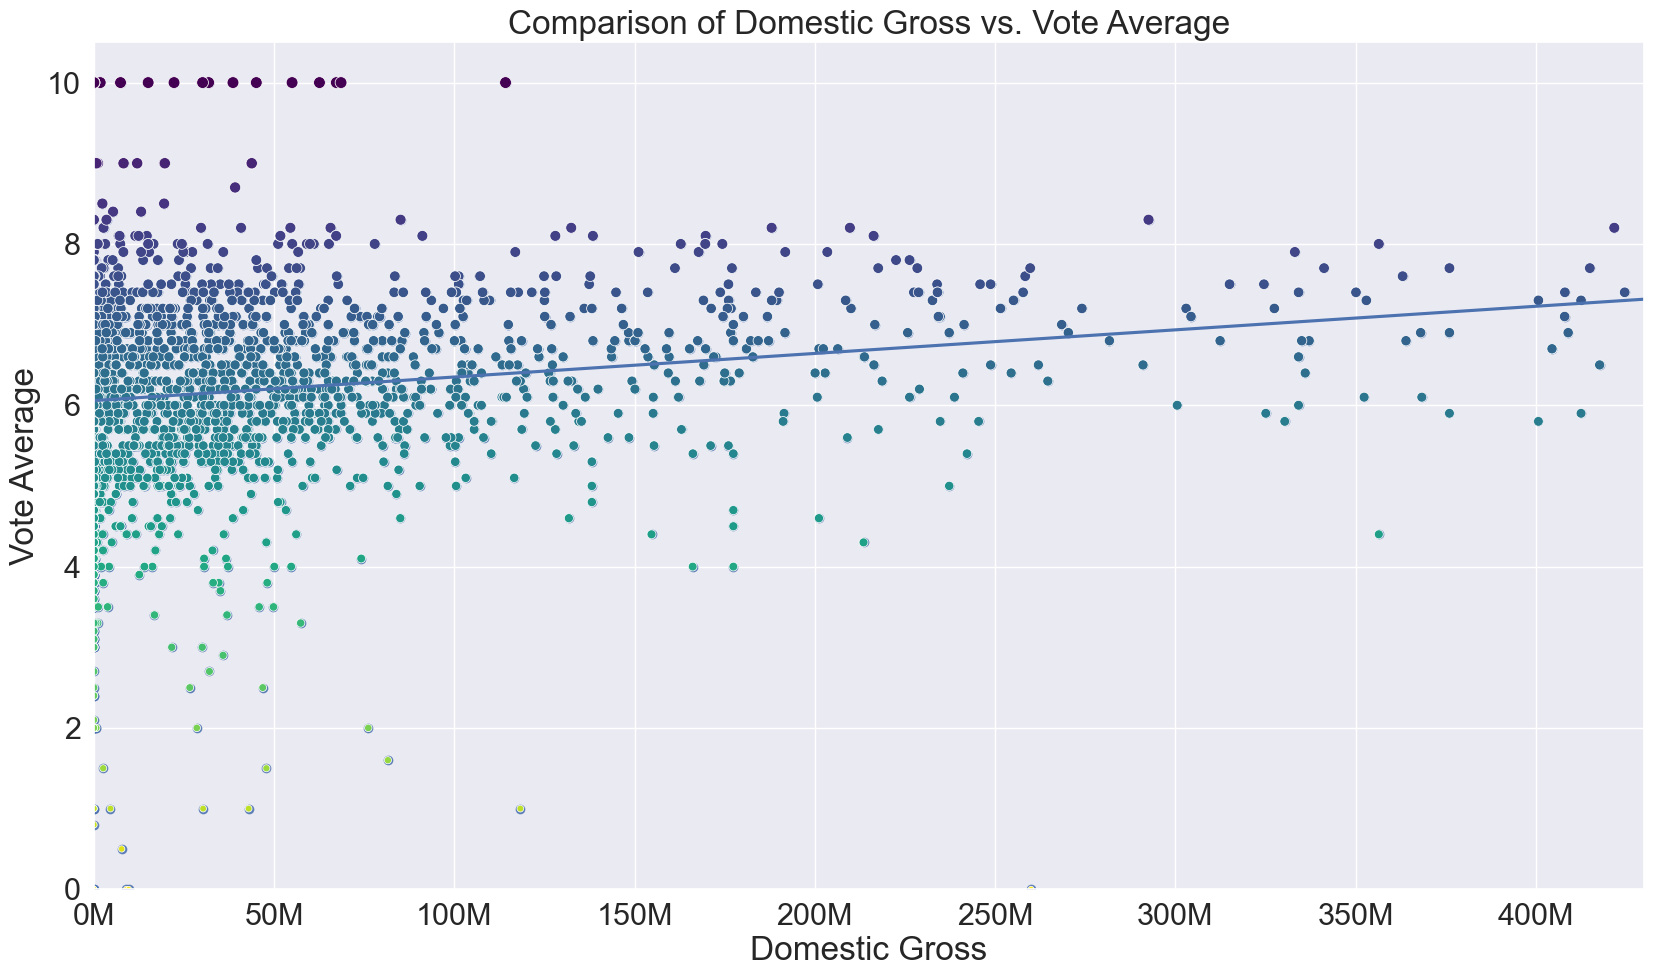

In [67]:


# from matplotlib import pyplot as plt
# plt.scatter(x=df1['domestic_gross'], y=df1['vote_average'])
# plt.title('Vote Average Vs Domestic Gross')
# plt.xlabel('Domestic Gross Earnings')
# plt.ylabel('Vote Average')  # rotate labels
# # ax.set_xticks([1, 3, 5, 7, 9])

#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="domestic_gross", y="vote_average", ci=None, data=df1)
#data frame with adjust x/y with aesthetics
dgva=sns.scatterplot(data=df1, x="domestic_gross", y="vote_average", 
                size="vote_average", hue="vote_average", palette="viridis_r", legend=False)
#expanding x-axis
plt.xlim([0,430000000])
#extending y-axis for outlier
plt.ylim(0)
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
dgva.set(xlabel ="Domestic Gross", ylabel = "Vote Average", 
        title ='Comparison of Domestic Gross vs. Vote Average')
#creating list of formated x-ticks
xlabels = ['{:,.0f}'.format(x) + 'M' for x in dgva.get_xticks()/1000000]
#replacing x-ticks
dgva.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) for x in dgva.get_yticks()]
#replacing y-ticks
dgva.set_yticklabels(ylabels)

In [27]:
# from matplotlib import pyplot as plt
# plt.scatter(x=df1['vote_average'], y=df1['domestic_gross'])
# plt.title('Vote Average Vs Domestic Gross')
# plt.ylabel('Domestic Gross Earnings')
# plt.xlabel('Vote Average')
#--
#sets background color and increase in font size
# sns.set_theme(style="darkgrid", font_scale=2)
# #increase figure size
# plt.figure(figsize=(20,11))
# #regression line plot
# sns.regplot(x="vote_average", y="domestic_gross", ci=None, data=df1)
# #data frame with adjust x/y with aesthetics
# vagd=sns.scatterplot(data=df1, x="vote_average", y="domestic_gross",
#                 size="domestic_gross", hue="domestic_gross", palette="viridis_r", legend=False)
# #expanding x-axis
# plt.xlim([0,430000000])
# #extending y-axis for outlier
# plt.ylim(0)
# #supressing scientific notation
# plt.ticklabel_format(style='plain')
# # add label to the axis and label to the plot
# vagd.set(xlabel = "Vote Average", ylabel ="Domestic Gross",
#         title ='Comparison of Vote Average vs. Domestic Gross')

# #creating list of formated y-ticks
# # xlabels = ['{:,.0f}']
# # #replacing x-ticks
# # vagd.set_xticklabels(xlabels)
# #creating list of formated x-ticks
# ylabels = ['{:,.0f}'.format(x) + 'M' for x in vagd.get_yticks()/1000000]
# #replacing y-ticks
# vagd.set_yticklabels(ylabels)
#--
# #creating list of formated x-ticks
# ylabels = ['{:,.0f}'.format(x) + 'M' for x in dgva.get_yticks()/1000000]
# #replacing x-ticks
# dgva.set_xticklabels(xlabels)
# #creating list of formated y-ticks
# xlabels = ['{:,.0f}'.format(x) for x in dgva.get_xticks()]
# #replacing y-ticks
# dgva.set_yticklabels(ylabels)


In [28]:
df1['domestic_gross'].describe()

count    2.385000e+03
mean     4.948916e+07
std      8.275210e+07
min      0.000000e+00
25%      8.818240e+05
50%      2.015730e+07
75%      5.789180e+07
max      7.605076e+08
Name: domestic_gross, dtype: float64

In [29]:
df1['domestic_gross'].max()

760507625

<AxesSubplot:xlabel='vote_average', ylabel='domestic_gross'>

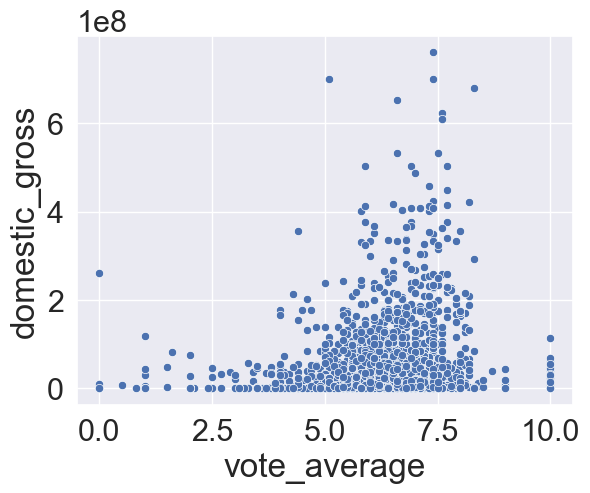

In [30]:
import seaborn as sns
sns.scatterplot(data=df1, x="vote_average", y="domestic_gross")

In [31]:
bomDF

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [32]:
# # OP.max()

# NWEdf=df1.groupby(['genre_ids'])['worldwide_gross'].mean().reset_index(name='Genre_Gross')
# # total

# # NWEdf
bomDF=bomDF.rename(columns={'title': 'movie'})
#new_df.drop(columns=['original_title'],inplace=True)
Arev = pd.merge(tmdbDF, bomDF, on='movie', how='inner') # inner join 
Arev


,genre_ids,id,original_language,original_title,popularity,release_date,movie,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,"[Animation, Family, Adventure]",455842,en,Elliot: The Littlest Reindeer,2.903,2018-11-30,Elliot: The Littlest Reindeer,3.4,7,Scre.,24300.0,0.0,2018
2678,"[Action, Adventure, Animation]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000.0,2018
2679,[Comedy],498919,es,La Boda de Valentina,2.550,2018-02-09,La Boda de Valentina,6.3,7,PNT,2800000.0,0.0,2018
2680,[Drama],470641,hi,मुक्काबाज़,2.276,2018-01-12,Mukkabaaz,7.5,18,Eros,75900.0,0.0,2018


In [33]:
 new_df = Arev.explode('genre_ids').reset_index(drop=True)
new_df

,genre_ids,id,original_language,original_title,popularity,release_date,movie,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
2,Animation,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
3,Family,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
4,Adventure,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211,Animation,332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000.0,2018
6212,Comedy,498919,es,La Boda de Valentina,2.550,2018-02-09,La Boda de Valentina,6.3,7,PNT,2800000.0,0.0,2018
6213,Drama,470641,hi,मुक्काबाज़,2.276,2018-01-12,Mukkabaaz,7.5,18,Eros,75900.0,0.0,2018
6214,Romance,551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,CL,181000.0,0.0,2018


In [34]:
OP=new_df.groupby('genre_ids')['vote_average'].mean()
OP

genre_ids
Action             6.284000
Adventure          6.454335
Animation          6.689103
Comedy             6.250493
Crime              6.385570
Documentary        6.990217
Drama              6.565770
Family             6.432500
Fantasy            6.376995
History            6.822222
Horror             5.780973
Music              6.703571
Mystery            6.321429
Romance            6.417866
Science Fiction    6.363084
TV Movie           4.900000
Thriller           6.205184
War                6.775949
Western            6.531034
Name: vote_average, dtype: float64

In [35]:
Arev2=new_df.groupby(['genre_ids'])['foreign_gross'].mean().reset_index(name='Foreign_Revenue')
Arev4=Arev2.sort_values(['Foreign_Revenue'], ascending=False)
Arev4

,genre_ids,Foreign_Revenue
1,Adventure,2.087814e+08
2,Animation,1.846738e+08
14,Science Fiction,1.606714e+08
8,Fantasy,1.593216e+08
7,Family,1.584700e+08
0,Action,1.340926e+08
15,TV Movie,7.195000e+07
18,Western,6.034876e+07
3,Comedy,5.672662e+07
17,War,4.746587e+07


C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\3679173371.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  gifr.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 25000000.0, '25M'),
 Text(0, 50000000.0, '50M'),
 Text(0, 75000000.0, '75M'),
 Text(0, 100000000.0, '100M'),
 Text(0, 125000000.0, '125M'),
 Text(0, 150000000.0, '150M'),
 Text(0, 175000000.0, '175M'),
 Text(0, 200000000.0, '200M'),
 Text(0, 225000000.0, '225M')]

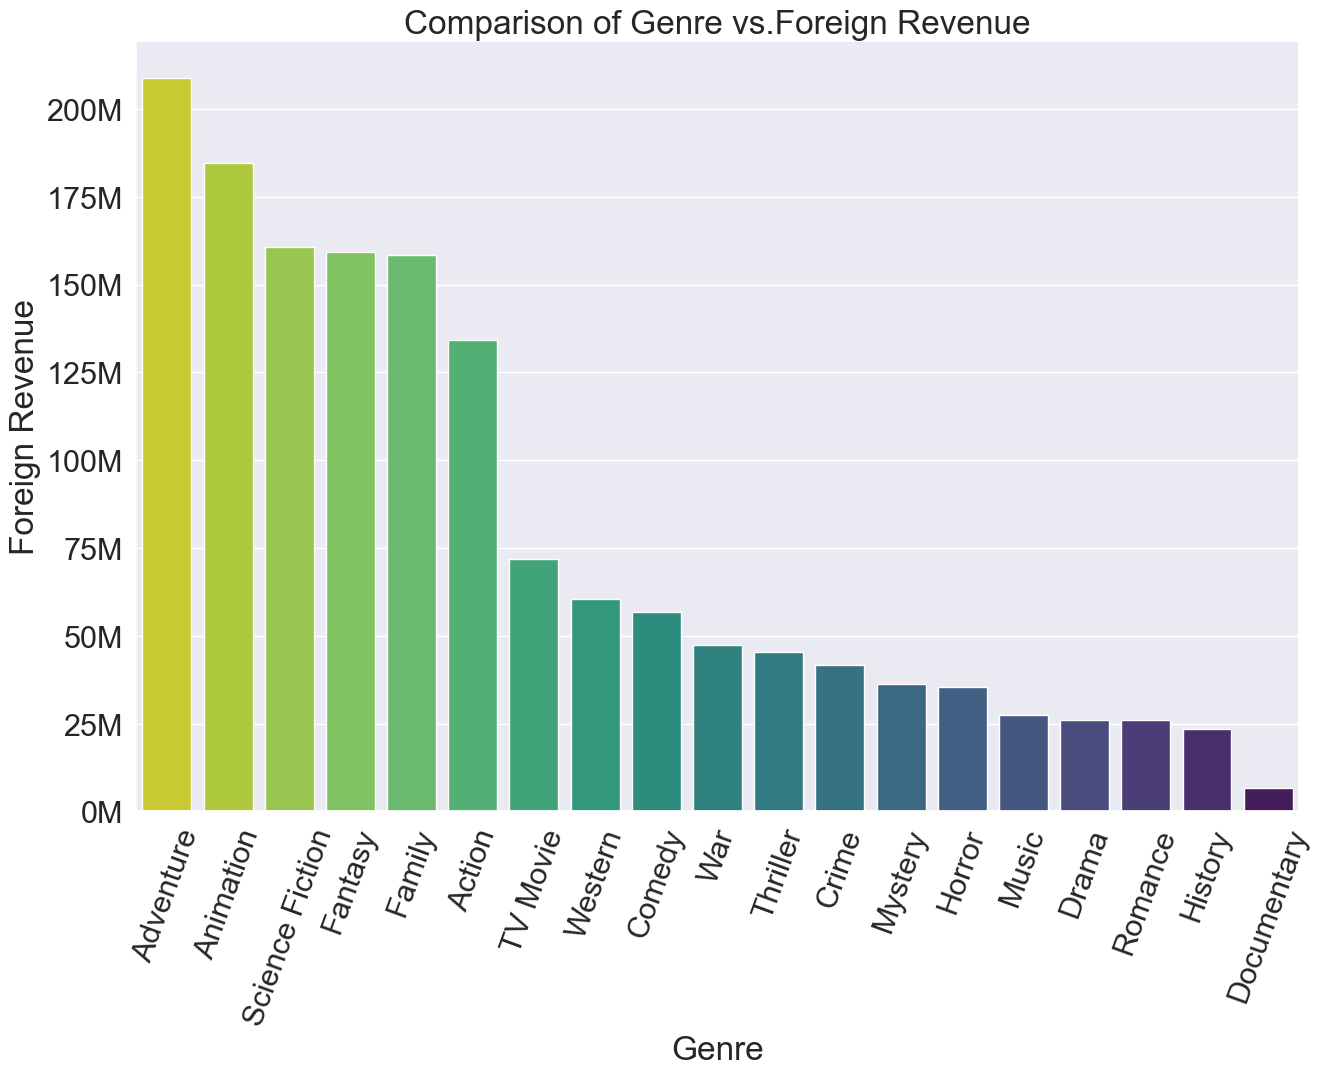

In [36]:
plt.figure(figsize=(15,10))
gifr=sns.barplot(x = "genre_ids", y = "Foreign_Revenue", data =Arev4, palette="viridis_r")
plt.xticks(rotation=70)

gifr.set(xlabel ="Genre", ylabel = "Foreign Revenue", 
        title ='Comparison of Genre vs.Foreign Revenue')
#creating list of formated x-ticks
# xlabels = ['{:,.0f}']
# #replacing x-ticks
# gifr.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in gifr.get_yticks()/1000000]
#replacing y-ticks
gifr.set_yticklabels(ylabels)

C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\131443723.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  drg.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 20000000.0, '20M'),
 Text(0, 40000000.0, '40M'),
 Text(0, 60000000.0, '60M'),
 Text(0, 80000000.0, '80M'),
 Text(0, 100000000.0, '100M'),
 Text(0, 120000000.0, '120M'),
 Text(0, 140000000.0, '140M')]

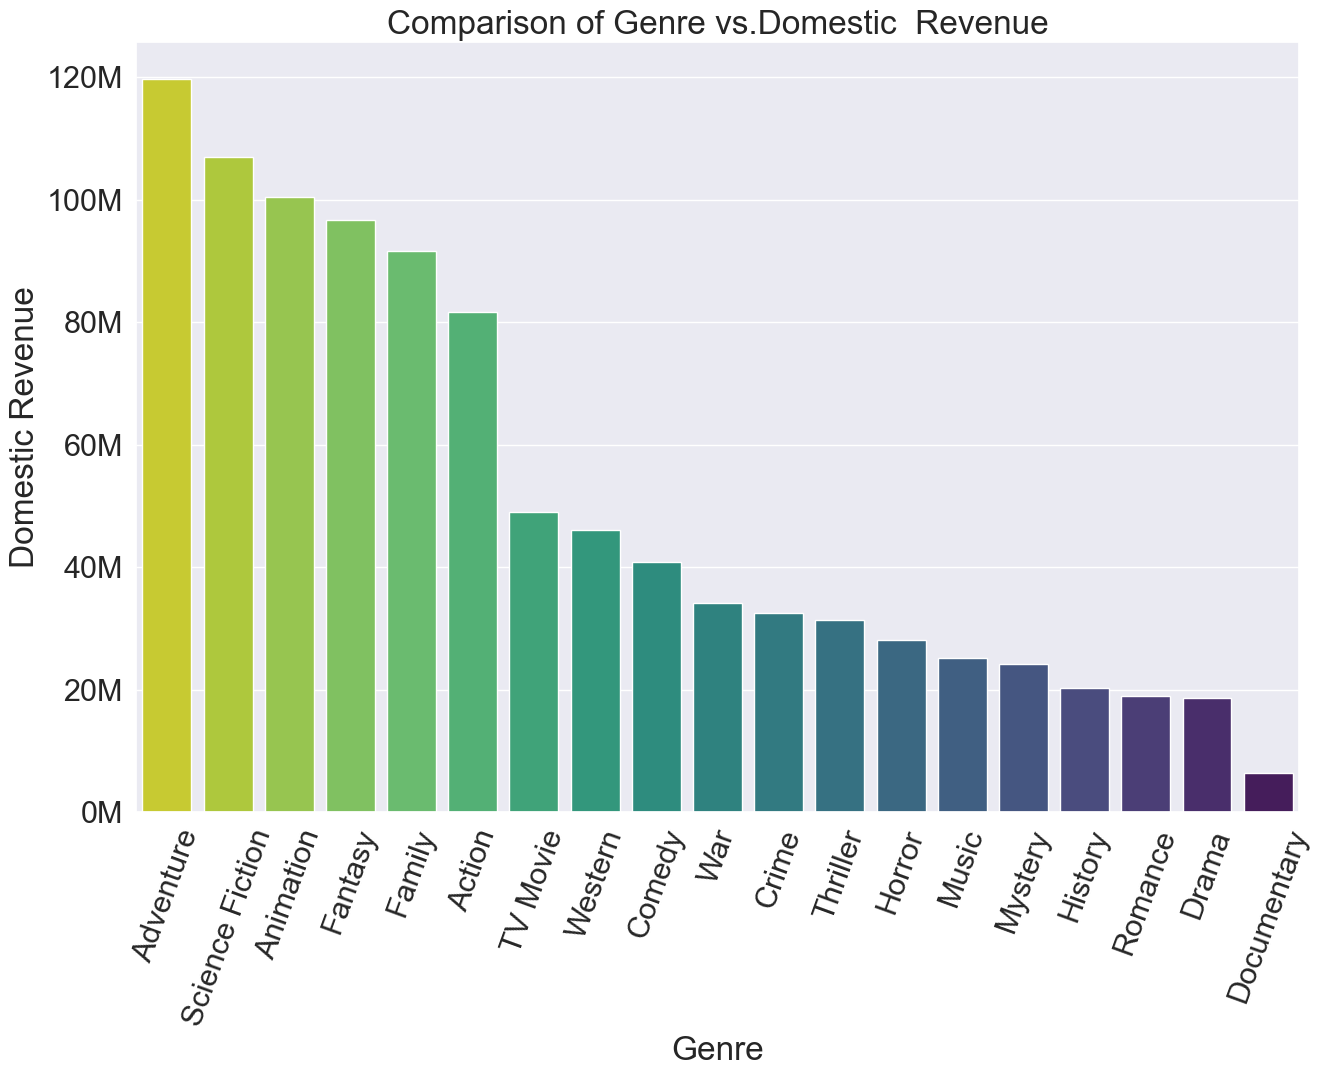

In [37]:
plt.figure(figsize=(15,10))
Arev3=new_df.groupby(['genre_ids'])['domestic_gross'].mean().reset_index(name='Domestic_Revenue')
Arev5=Arev3.sort_values(['Domestic_Revenue'], ascending=False)
drg=sns.barplot(x = "genre_ids", y = "Domestic_Revenue", data =Arev5,  palette="viridis_r")
plt.xticks(rotation=70)


drg.set(xlabel ="Genre", ylabel = "Domestic Revenue", 
        title ='Comparison of Genre vs.Domestic  Revenue')
#creating list of formated x-ticks
# xlabels = ['{:,.0f}']
# #replacing x-ticks
# gifr.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in drg.get_yticks()/1000000]
#replacing y-ticks
drg.set_yticklabels(ylabels)

In [38]:
Arev2

,genre_ids,Foreign_Revenue
0,Action,1.340926e+08
1,Adventure,2.087814e+08
2,Animation,1.846738e+08
3,Comedy,5.672662e+07
4,Crime,4.177486e+07
5,Documentary,6.575805e+06
6,Drama,2.606550e+07
7,Family,1.584700e+08
8,Fantasy,1.593216e+08
9,History,2.361183e+07


## Hypothesis Testing

H0= Adventure movies earn the same in the box office as every other Genre


H1= Adventure movies do better in the box office than other Genres

In [39]:
Arev4.describe() #adventure is the highest 
#['Foreign_Revenue'].max() is the mean for Adventure Genre
# z= (Arev4['Foreign_Revenue'].max()-Arev4['Foreign_Revenue'].mean())/(Arev4['Foreign_Revenue'].std()/np.sqrt(19))
# print(z)

,Foreign_Revenue
count,1.900000e+01
mean,7.954329e+07
std,6.462008e+07
min,6.575805e+06
25%,3.152349e+07
50%,4.746587e+07
75%,1.462813e+08
max,2.087814e+08


In [40]:
x_bar = Arev4['Foreign_Revenue'].max()
print(x_bar)

208781401.0147399


In [41]:
#Mu=Arev4['Foreign_Revenue'].mean()
Mu=bomDF['domestic_gross'].mean()
print(Mu)

28745845.06698422


In [42]:
sigma=Arev4['Foreign_Revenue'].std()
print(sigma)

64620079.4221603


In [43]:
z=(x_bar-Mu)/(sigma/np.sqrt(19))
print(z)

12.144163263768938


In [44]:
import scipy.stats as stats
stats.norm.cdf(z)
print(stats.norm.cdf(z))

1.0


In [45]:
new_df.value_counts()

genre_ids  id      original_language  original_title         popularity  release_date  movie                  vote_average  vote_count  studio  domestic_gross  foreign_gross  year
Drama      244539  en                 Infinitely Polar Bear  8.715       2016-06-19    Infinitely Polar Bear  6.8           209         SPC     1400000.0       0.0            2015    3
Music      283330  en                 Eden                   5.373       2015-06-19    Eden                   5.8           57          BG      65500.0         0.0            2015    3
Comedy     244539  en                 Infinitely Polar Bear  8.715       2016-06-19    Infinitely Polar Bear  6.8           209         SPC     1400000.0       0.0            2015    3
Fantasy    11976   en                 Legend                 10.542      1986-04-18    Legend                 6.2           509         Uni.    1900000.0       41100000.0     2015    3
Adventure  11976   en                 Legend                 10.542      1986-04

In [46]:
Arev5.describe()

,Domestic_Revenue
count,1.900000e+01
mean,5.122412e+07
std,3.575393e+07
min,6.368207e+06
25%,2.469519e+07
50%,3.425443e+07
75%,8.660688e+07
max,1.196849e+08


## DF1 Cleaning

In [47]:
df1 = df1[df1['worldwide_gross'].notna()]
df1 = df1[df1['production_budget'].notna()]
df1['worldwide_gross']=df1['worldwide_gross'].apply(lambda x: x.replace('$', ''))
df1['worldwide_gross'] = df1['worldwide_gross'].replace([','],'', regex=True)
df1['worldwide_gross'] = pd.to_numeric(df1['worldwide_gross'])
df1['production_budget']=df1['production_budget'].apply(lambda x: x.replace('$', ''))
df1['production_budget'] = df1['production_budget'].replace([','],'', regex=True)
df1['production_budget'] = pd.to_numeric(df1['production_budget'])
df1

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,movie,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010",165000000,217581232,494870992
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010",170000000,312433331,621156389
2,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516
3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516
4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010",160000000,292576195,835524642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,66,"Nov 6, 2009",25000000,15051977,34356760
2381,[Music],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,66,"Nov 6, 2009",25000000,15051977,34356760
2382,"[Comedy, Animation]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,"May 24, 2002",38000000,39177215,50970660
2383,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,"Aug 26, 2005",9000000,1069318,1069318


DF1 Create Profit

In [59]:
df1["Profit"] = df1["worldwide_gross"] - df1["production_budget"]

C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\3185957845.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  vapb.set_xticklabels(xlabels)
C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\3185957845.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  vapb.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 50000000.0, '50M'),
 Text(0, 100000000.0, '100M'),
 Text(0, 150000000.0, '150M'),
 Text(0, 200000000.0, '200M'),
 Text(0, 250000000.0, '250M'),
 Text(0, 300000000.0, '300M'),
 Text(0, 350000000.0, '350M'),
 Text(0, 400000000.0, '400M'),
 Text(0, 450000000.0, '450M')]

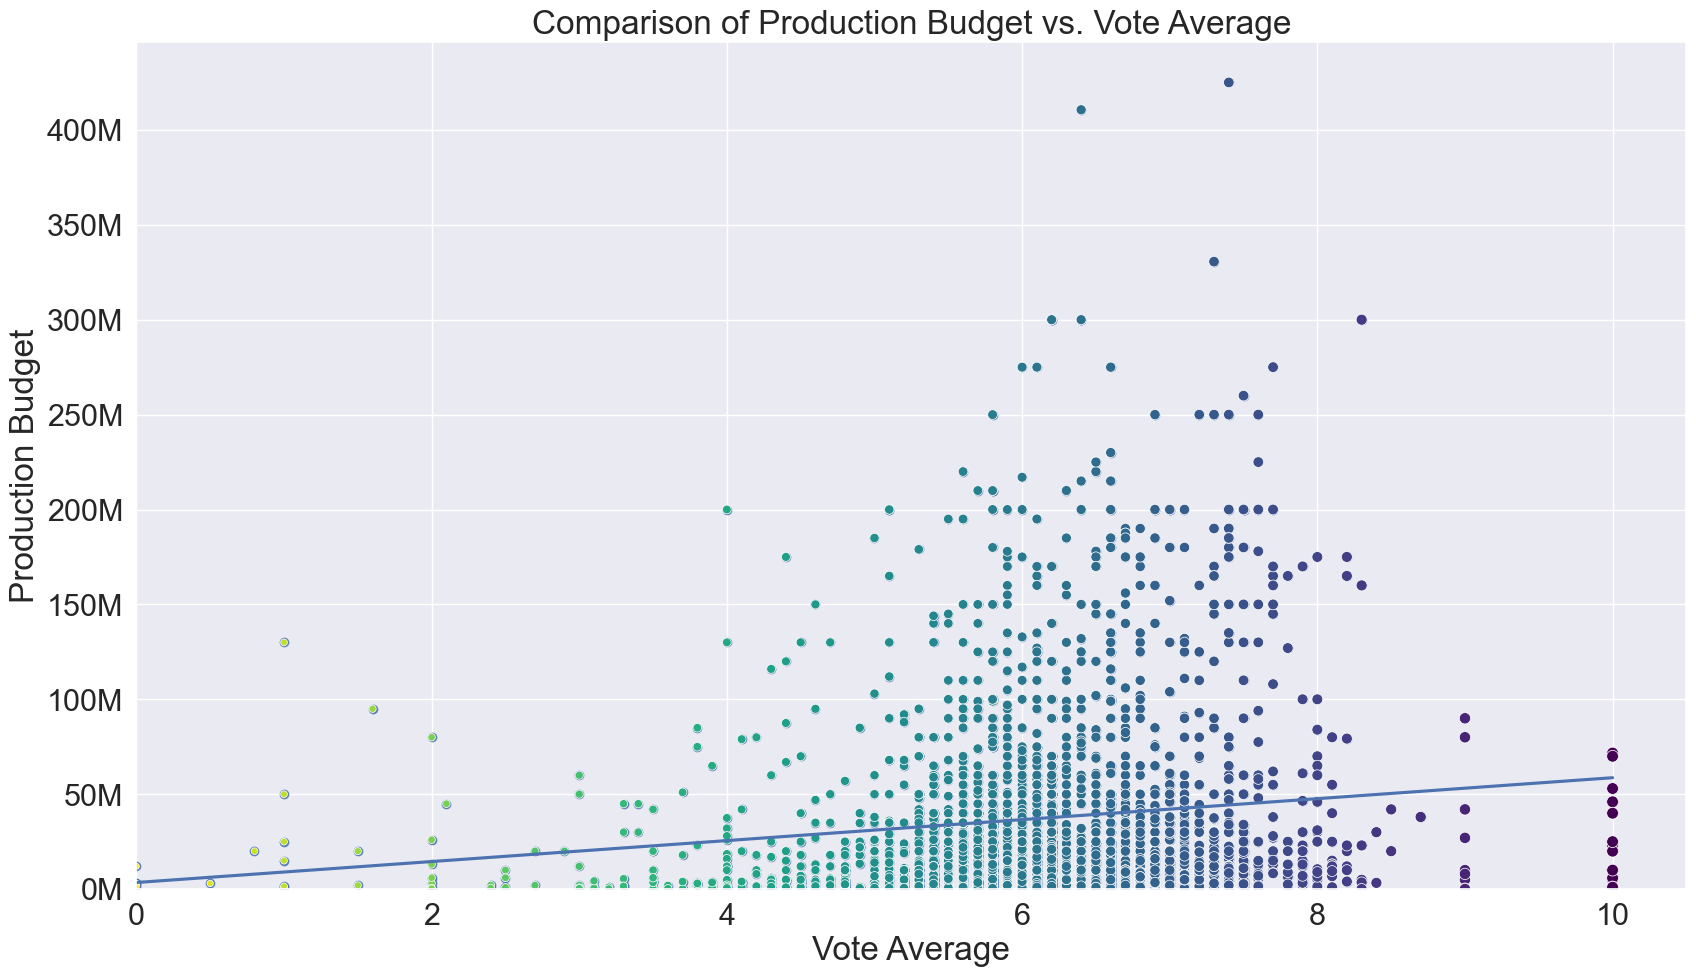

In [48]:
# sns.scatterplot(data=df1, x="vote_average", y="production_budget")
# plt.ticklabel_format(style='plain')
# plt.xlim(0) # add this for all the graphs
# plt.ylim(0)

#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
vapb=sns.regplot(x="vote_average", y="production_budget", ci=None, data=df1)
#data frame with adjust x/y with aesthetics
vapb=sns.scatterplot(data=df1, x="vote_average", y="production_budget", 
                size="vote_average", hue="vote_average", palette="viridis_r", legend=False)
#expanding x-axis
plt.xlim(0)
#extending y-axis for outlier
plt.ylim(0)
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
vapb.set(xlabel ="Vote Average", ylabel = "Production Budget", 
        title ='Comparison of Production Budget vs. Vote Average')
#creating list of formated x-ticks
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in vapb.get_xticks()/1000000]
xlabels = ['{:,.0f}'.format(x) for x in vapb.get_xticks()]
#replacing x-ticks
vapb.set_xticklabels(xlabels)
#creating list of formated y-ticks
# ylabels = ['{:,.0f}'.format(x) for x in vapb.get_yticks()]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in vapb.get_yticks()/1000000]
#replacing y-ticks
vapb.set_yticklabels(ylabels)

C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\542996881.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  pbva.set_xticklabels(xlabels)
C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\542996881.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  pbva.set_yticklabels(ylabels)


[Text(0, 0.0, '0'),
 Text(0, 2.0, '2'),
 Text(0, 4.0, '4'),
 Text(0, 6.0, '6'),
 Text(0, 8.0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 12.0, '12')]

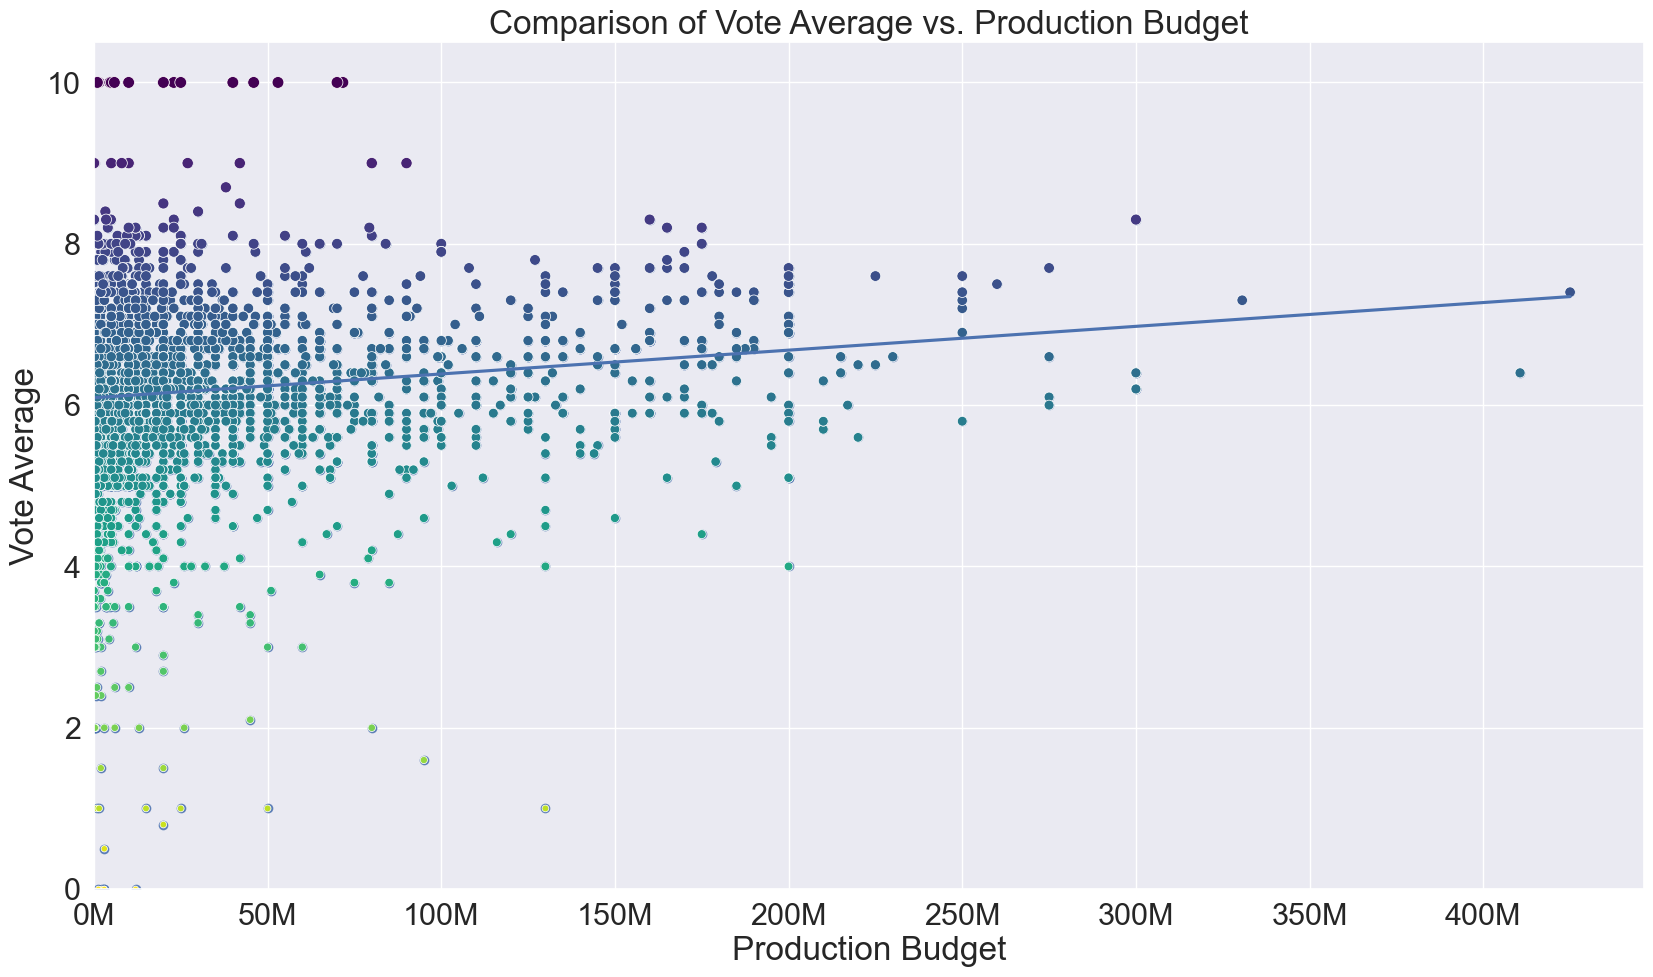

In [66]:
# sns.scatterplot(data=df1, x="vote_average", y="production_budget")
# plt.ticklabel_format(style='plain')
# plt.xlim(0) # add this for all the graphs
# plt.ylim(0)

#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
pbva=sns.regplot(x="production_budget", y="vote_average", ci=None, data=df1)
#data frame with adjust x/y with aesthetics
pbva=sns.scatterplot(data=df1, x="production_budget", y="vote_average", 
                size="vote_average", hue="vote_average", palette="viridis_r", legend=False)
#expanding x-axis
plt.xlim(0)
#extending y-axis for outlier
plt.ylim(0)
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
pbva.set(xlabel ="Production Budget", ylabel = "Vote Average", 
        title ='Comparison of Vote Average vs. Production Budget')
#creating list of formated x-ticks
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in vapb.get_xticks()/1000000]
xlabels = ['{:,.0f}'.format(x) + 'M' for x in pbva.get_xticks()/1000000]
#replacing x-ticks
pbva.set_xticklabels(xlabels)
#creating list of formated y-ticks
# ylabels = ['{:,.0f}'.format(x) for x in vapb.get_yticks()]
ylabels = ['{:,.0f}'.format(x) for x in pbva.get_yticks()]
#replacing y-ticks
pbva.set_yticklabels(ylabels)

C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\1665336348.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  vapb.set_xticklabels(xlabels)
C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\1665336348.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  vapb.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 25000000.0, '25M'),
 Text(0, 50000000.0, '50M'),
 Text(0, 75000000.0, '75M'),
 Text(0, 100000000.0, '100M'),
 Text(0, 125000000.0, '125M'),
 Text(0, 150000000.0, '150M'),
 Text(0, 175000000.0, '175M'),
 Text(0, 200000000.0, '200M')]

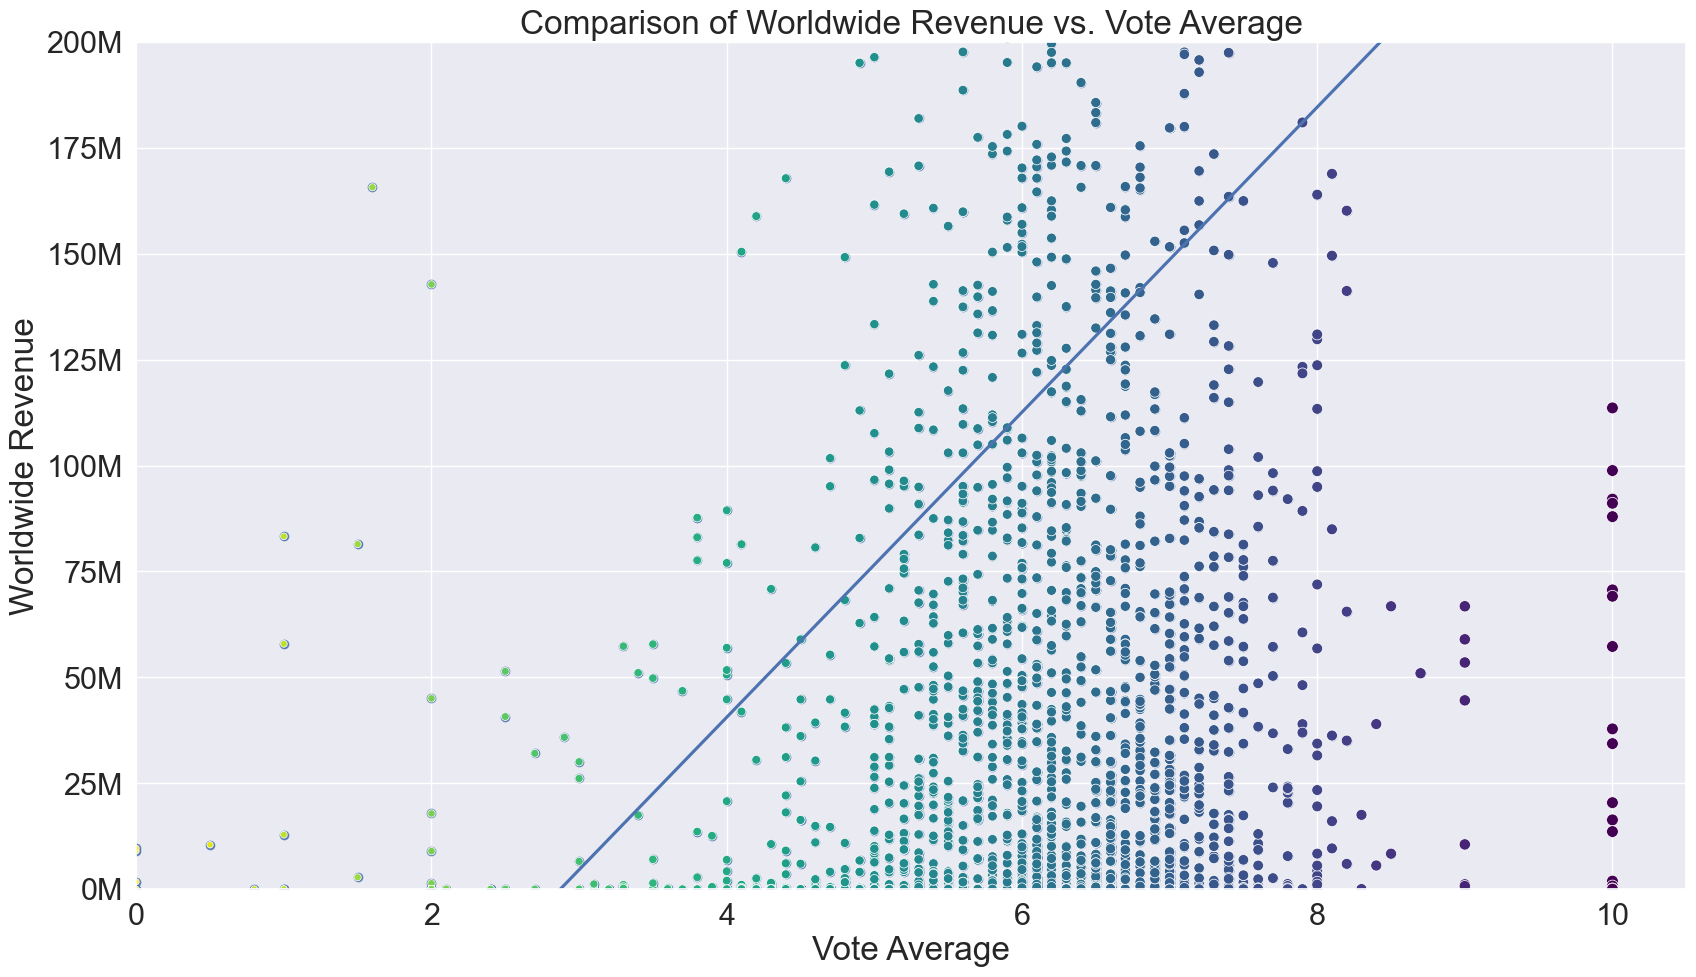

In [63]:
# wwg=sns.scatterplot(data=df1, x="vote_average", y="worldwide_gross")
# plt.ticklabel_format(style='plain')

#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
vapb=sns.regplot(x="vote_average", y="worldwide_gross", ci=None, data=df1)
#data frame with adjust x/y with aesthetics
vapb=sns.scatterplot(data=df1, x="vote_average", y="worldwide_gross", 
                size="vote_average", hue="vote_average", palette="viridis_r", legend=False)
#expanding x-axis
plt.xlim(0)
#extending y-axis for outlier
plt.ylim([0,200000000])
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
vapb.set(xlabel ="Vote Average", ylabel = "Worldwide Revenue", 
        title ='Comparison of Worldwide Revenue vs. Vote Average')
#creating list of formated x-ticks
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in vapb.get_xticks()/1000000]
xlabels = ['{:,.0f}'.format(x) for x in wwg.get_xticks()]
#replacing x-ticks
vapb.set_xticklabels(xlabels)
#creating list of formated y-ticks
# ylabels = ['{:,.0f}'.format(x) for x in vapb.get_yticks()]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in wwg.get_yticks()/1000000]
#replacing y-ticks
vapb.set_yticklabels(ylabels)

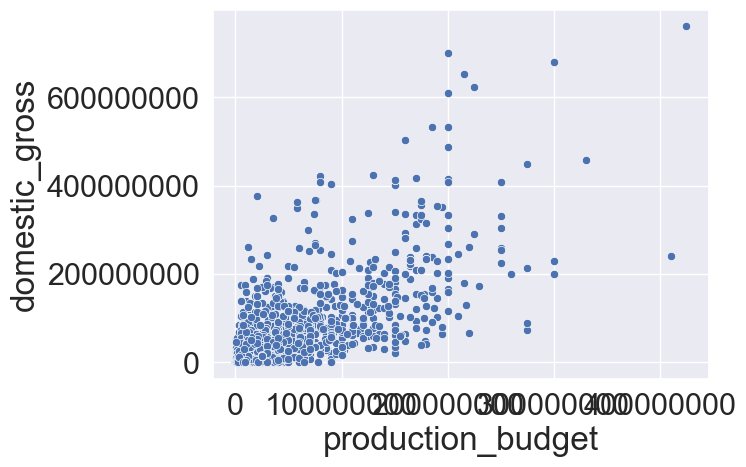

In [50]:
sns.scatterplot(data=df1, x="production_budget", y="domestic_gross")
plt.ticklabel_format(style='plain')

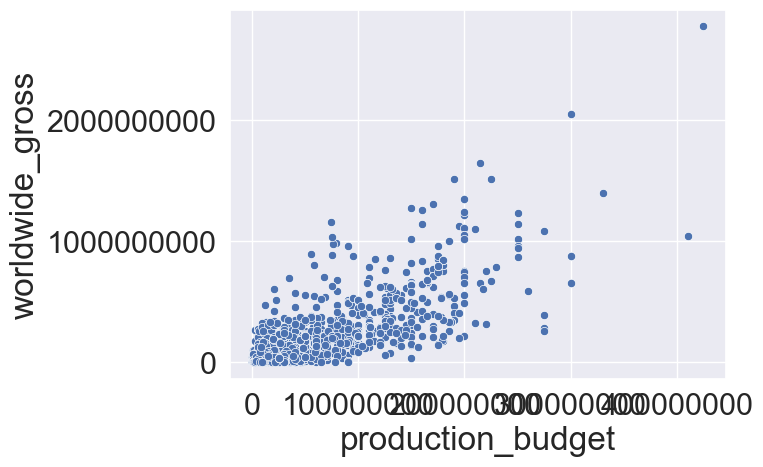

In [51]:
sns.scatterplot(data=df1, x="production_budget", y="worldwide_gross")
plt.ticklabel_format(style='plain')
# sns.set_style('plain')
#ticklabel_format(style= 'plain')

In [52]:
#df1[df1['original_language'].notna()]
#Total_original=df1['original_language'].value_counts()
total=df1.groupby(['original_language'])['worldwide_gross'].mean().reset_index(name='Average_world_gross')
total
#MeanGross )= MeanGross[df1['Worldwide_gross'], ]

,original_language,Average_world_gross
0,ar,4.585970e+05
1,da,2.181730e+07
2,de,3.092328e+07
3,el,9.962487e+07
4,en,1.226665e+08
5,es,2.062102e+07
6,et,1.918620e+05
7,fa,9.589780e+05
8,fr,1.028574e+08
9,gu,3.062898e+07


C:\Users\jabrahmbhatt\AppData\Local\Temp\ipykernel_50824\2351972485.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  wgl.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 50000000.0, '50M'),
 Text(0, 100000000.0, '100M'),
 Text(0, 150000000.0, '150M'),
 Text(0, 200000000.0, '200M'),
 Text(0, 250000000.0, '250M'),
 Text(0, 300000000.0, '300M'),
 Text(0, 350000000.0, '350M')]

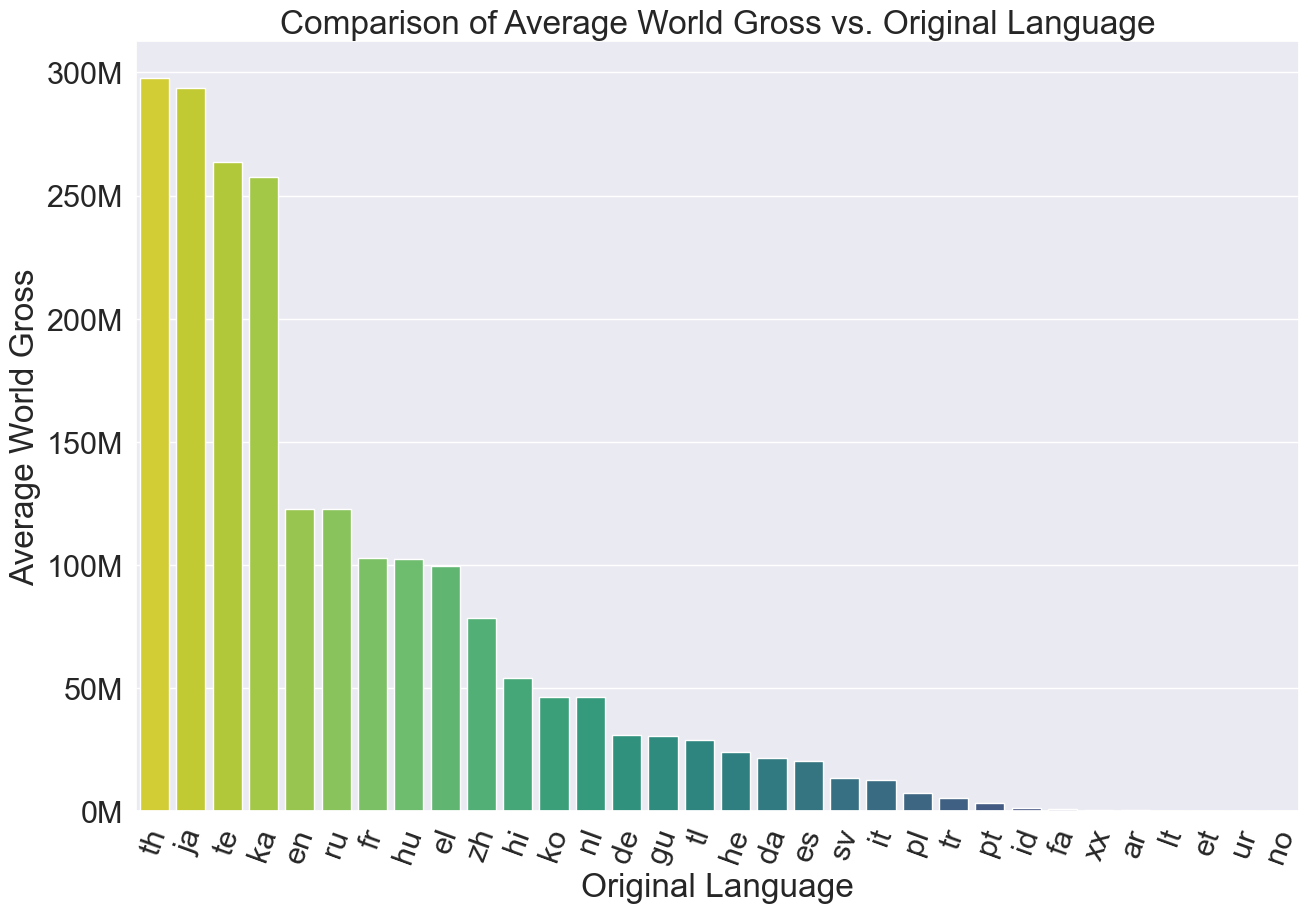

In [53]:
# sns.barplot(x = "original_language", y = "Average_world_gross", data =total, palette="viridis_r")
#highest grossing movie was japanese and Telegu other than english- believe that this is an outlier

plt.figure(figsize=(15,10))
T1=total.sort_values(['Average_world_gross'], ascending=False)
wgl=sns.barplot(x = "original_language", y = "Average_world_gross", data =T1,  palette="viridis_r")
plt.xticks(rotation=70)

wgl.set(xlabel ="Original Language", ylabel = "Average World Gross", 
        title ='Comparison of Average World Gross vs. Original Language')
#creating list of formated x-ticks
# xlabels = ['{:,.0f}']
# #replacing x-ticks
# gifr.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in wgl.get_yticks()/1000000]
#replacing y-ticks
wgl.set_yticklabels(ylabels)

In [54]:
total['Average_world_gross'].max() #297677881.0
print(total)

   original_language  Average_world_gross
0                 ar         4.585970e+05
1                 da         2.181730e+07
2                 de         3.092328e+07
3                 el         9.962487e+07
4                 en         1.226665e+08
5                 es         2.062102e+07
6                 et         1.918620e+05
7                 fa         9.589780e+05
8                 fr         1.028574e+08
9                 gu         3.062898e+07
10                he         2.400157e+07
11                hi         5.417797e+07
12                hu         1.023065e+08
13                id         1.227316e+06
14                it         1.262037e+07
15                ja         2.935788e+08
16                ka         2.576416e+08
17                ko         4.665680e+07
18                lt         3.144440e+05
19                nl         4.628115e+07
20                no         2.222600e+04
21                pl         7.651002e+06
22                pt         3.276

<AxesSubplot:xlabel='original_language', ylabel='Voter_Average'>

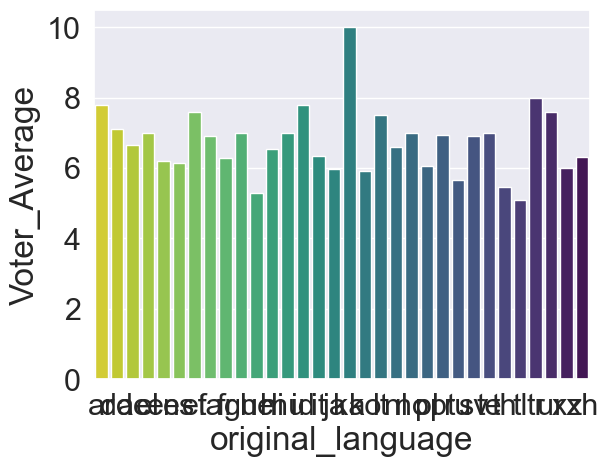

In [55]:
total_2=df1.groupby(['original_language'])['vote_average'].mean().reset_index(name='Voter_Average')
sns.barplot(x = "original_language", y = "Voter_Average", data =total_2,  palette="viridis_r")

<AxesSubplot:xlabel='original_language', ylabel='Production_Budget'>

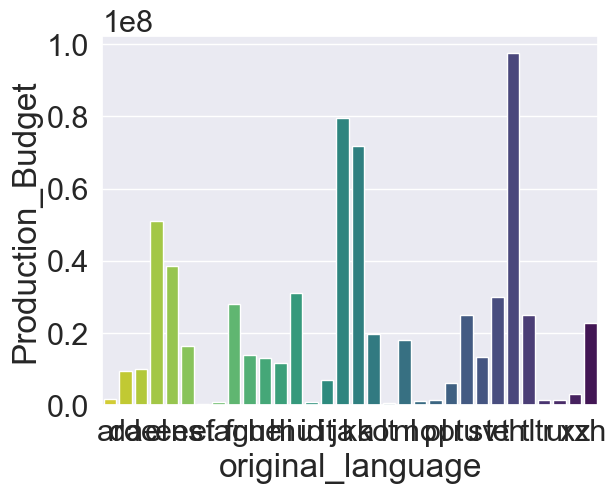

In [56]:
total_3=df1.groupby(['original_language'])['production_budget'].mean().reset_index(name='Production_Budget')
sns.barplot(x = "original_language", y = "Production_Budget", data =total_3,  palette="viridis_r")

In [57]:
#Change column name in the movieDB df - need this to be able to join tables on movie title
bomDF=bomDF.rename(columns={'title': 'movie'})

#Inner join tables on movie title
studioDF = pd.merge(tmdbDF, bomDF, on='movie', how='inner')
studioDF.head()

,genre_ids,id,original_language,original_title,popularity,release_date,movie,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010


In [58]:
#Perform inner join on id
rotten_tomatoes_full = pd.merge(rtDF, rtDF_reviews, on='id', how='inner')

#View results
# rotten_tomatoes_full.head()

#Drop unnecessary columns 
rotten_tomatoes_full.drop(columns=['rating_y','critic','review'],inplace=True)

#View results
rotten_tomatoes_full.head()

,id,rating_x,genre,director,writer,theater_date,box_office,runtime,fresh,sum_fresh,count_fresh,percentage
0,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes,1,103,163,0.631902
1,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes,0,103,163,0.631902
2,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes,1,103,163,0.631902
3,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes,1,103,163,0.631902
4,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes,1,103,163,0.631902
